In [ ]:
#What are we going to cover:
#0. An end to end Scikit Learn Workflow
#1. Getting data ready.
#2. Choose the right estimator/ algorithm for our problems
#3. Fit the model/algorithm and use it to make predictions on our data
#4. Evaluating a model
#5. Improve the model
#6. Save and load a trained model
#7. Put it all together.

In [ ]:
#0 An end to end Scikit Learn Workflow


In [ ]:
#Get data ready
import pandas as pd
import numpy as np

heart_disease=pd.read_csv("/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#Create X label
X=heart_disease.drop("target",axis=1)

#Create Y label
Y=heart_disease["target"]


In [ ]:
#Choose right model and hyperparameters
from sklearn.ensemble import  RandomForestClassifier
clf=RandomForestClassifier()
#We will keep the default parameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Fit the model to training data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2) #20 percent data will be test data

In [ ]:
clf.fit(X_train,Y_train);

In [ ]:
#Make a prediction
y_label=clf.predict(np.array([1,2,3,4]))   #our label dosen,t like out sample data and that's why its error

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
Y_preds=clf.predict(X_test)
Y_preds

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
Y_test

295    0
18     1
298    0
268    0
122    1
      ..
296    0
195    0
140    1
73     1
180    0
Name: target, Length: 61, dtype: int64

In [ ]:
#Evaluate the model on training and testing data
clf.score(X_train,Y_train)



1.0

In [ ]:
clf.score(X_test,Y_test)

0.9016393442622951

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.87      0.97      0.92        34

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61



In [ ]:
confusion_matrix(Y_test,Y_preds)

array([[22,  5],
       [ 1, 33]])

In [ ]:
accuracy_score(Y_test,Y_preds)

0.9016393442622951

In [ ]:
#5 Improve a model

#Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
  print(f"Trying model with {i} estimators")
  clf=RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
  print(f"Model accuracy on test set: {clf.score(X_test,Y_test)*100:.2f}%")
  print(" ")

Trying model with 10 estimators
Model accuracy on test set: 86.89%
 
Trying model with 20 estimators
Model accuracy on test set: 85.25%
 
Trying model with 30 estimators
Model accuracy on test set: 86.89%
 
Trying model with 40 estimators
Model accuracy on test set: 86.89%
 
Trying model with 50 estimators
Model accuracy on test set: 91.80%
 
Trying model with 60 estimators
Model accuracy on test set: 88.52%
 
Trying model with 70 estimators
Model accuracy on test set: 88.52%
 
Trying model with 80 estimators
Model accuracy on test set: 88.52%
 
Trying model with 90 estimators
Model accuracy on test set: 90.16%
 


In [ ]:
#Save a model and load it
import pickle
pickle.dump(clf, open("random_forest_model1.pkl","wb"))

In [ ]:
loaded_model=pickle.load(open("random_forest_model1.pkl","rb"))
loaded_model.score(X_test,Y_test)

0.9016393442622951

In [ ]:
import warnings
warnings.filterwarnings("ignore")  #if we don't want set to default

In [ ]:
#1) Getting out data ready to be used with machine learning

# Three main things we need to do:
#1) Split the data into features (X) and labels (Y)
#2) Filling (also called imputing) or disregarding missing values
#3) Converting non numerical values to numerical values (also called feature encoding)

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
heart_disease=pd.read_csv("/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
x=heart_disease.drop("target",axis=1)   #axis 1 is row containg heading, axis 0 is sr no
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
y=heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
#Split the data into training and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [ ]:
# Make sure all your data is numerical


In [ ]:
car_sales=pd.read_csv("/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [ ]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [ ]:
#Split the data
x=car_sales.drop("Price",axis=1)
y=car_sales["Price"]

#Split into test and train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [ ]:
#Build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_score,y_score)

ValueError: ignored

In [ ]:
car_sales["Doors"].value_counts()  #here doors are being considered as categories rather than numbers

4    856
5     79
3     65
Name: Doors, dtype: int64

In [ ]:
# strings need to be converted into float

# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# OneHotEncoder is used to transform categories into numbers
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
# hey columntransformer, use onehotencoder to convert categorical_features and spare remainder i.e. Odometer (KM)
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [ ]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [ ]:
#Method 2 to convert vategories into numbers
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [ ]:
 #Let's refit the model
 np.random.seed(42) #used to fix training and test data,if removed u will get different score everytime
 x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
 model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
model.score(x_test,y_test)

0.2446315439432729

In [ ]:
# What if there is missing values?

#1. Fill the data(also known as imputing)
#2. Remove the samples

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
car_sales_missing=pd.read_csv("/Car_sales_extended_missing.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
car_sales_missing.isna().sum()  #shows total missing values of each column

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
#Create x and y
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]


In [ ]:
#Let's convert our code to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# OneHotEncoder is used to transform categories into numbers
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
# hey columntransformer, use onehotencoder to convert categorical_features and spare remainder i.e. Odometer (KM)
transformed_x=transformer.fit_transform(x)
transformed_x     #As Nan is present value error will be there

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [ ]:
#Fill missing data with pandas
car_sales_missing["Doors"].value_counts()  #as most of the cars have 4 doors, we will fill missing values with 4

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [ ]:
#Fill the Make Column
car_sales_missing["Make"].fillna("missing",inplace=True)

#Fill the colour column
car_sales_missing["Colour"].fillna("missing",inplace=True)

#Fill the Odometer column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean,inplace=True)
#Fill the doors column
car_sales_missing["Doors"].fillna(4,inplace=True)

In [ ]:
car_sales_missing.isna().sum() #we left price coz we need to predict it and we can't fill anything that is not label
# run it again by mistake so price became 0 otherwise was 50

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [ ]:
#Remove rows with missing price values
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [ ]:
len(car_sales_missing)

950

In [ ]:
x=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]

In [ ]:
#Let's convert our code to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# OneHotEncoder is used to transform categories into numbers
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
# hey columntransformer, use onehotencoder to convert categorical_features and spare remainder i.e. Odometer (KM)
transformed_x=transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

In [ ]:
# Method 2: Imputation by SK Learn
import pandas as pd
import numpy as np
car_sales=pd.read_csv("/Car_sales_extended_missing.csv")


In [ ]:
car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
#Drop the rows with no labels
car_sales.dropna(subset=["Price"],inplace=True)
car_sales.isna().sum()


Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [ ]:
#Split into X and Y
X=car_sales.drop("Price",axis=1)
Y=car_sales["Price"]

In [ ]:
#Fill missing values with SK Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numberical with mean
categorical_imputer=SimpleImputer(strategy="constant",fill_value="missing")
door_imputer=SimpleImputer(strategy="constant",fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

# Define columns
categorical_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

#Create an imputer
imputer=ColumnTransformer([("categorical_imputer",categorical_imputer,categorical_features),("door_imputer",door_imputer,door_features),
                           ("num_imputer",num_imputer,num_features)])

#Transform data
filled_X= imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [ ]:
car_sales_filled=pd.DataFrame(filled_X,columns=["Make","Colours","Doors","Odometer (KM)"])
car_sales_filled

,Make,Colours,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [ ]:
car_sales_filled.isna().sum()

Make             0
Colours          0
Doors            0
Odometer (KM)    0
dtype: int64

In [ ]:
#Let's convert our code to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# OneHotEncoder is used to transform categories into numbers
categorical_features=["Make","Colours","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
# hey columntransformer, use onehotencoder to convert categorical_features and spare remainder i.e. Odometer (KM)
transformed_x=transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [ ]:
#Now we have got data as numbers so let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(transformed_x,Y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.21990196728583944

In [ ]:
## 2. Choosing the right kind of algorithms/estimators

# Sklearn refers to machine learning models,algorithms as estimators
# Classification problem: predicting a category (heart disease or not)
# sometimes we will see clf used as classification estimator
# Regression problem: predicting a number (price of car)
# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


In [ ]:
#2.1 Picking a machine learning problem for regression problesm
# Get datasets from https://scikit-learn.org/stable/datasets/toy_dataset.html


In [ ]:
# Fetch California housing dataset
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
housing_df["MedHouseVal"]=housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
housing_df["target"]=housing["target"]
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [ ]:
housing_df=housing_df.drop("MedHouseVal",axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
#Import algorithm
from sklearn.linear_model import Ridge     # assuming no features are important

# Setup random seed
np.random.seed(42)


#Create the data
X=housing_df.drop("target",axis=1)
y=housing_df["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Instaniate and fit the model
model=Ridge()
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.5758549611440126

In [ ]:
# What if Ridge didn't work as per our needs?
# we could always use different models
# Let's use as ensemble model (combination of smaller models to try and make better predictions than a single model)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8066196804802649

In [ ]:
heart_disease=pd.read_csv("/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
len(heart_disease)

303

In [ ]:
# Consulting the map it says to try LinearSVC


In [ ]:
#Import LinearSVC
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

#Create the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instaniate LinearSVC
clf=LinearSVC()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [ ]:
#Let's try with RandomForestClassifer

from sklearn.ensemble import RandomForestClassifier

#Setup random seed
np.random.seed(42)

#Create the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instaniate Random Forest Classifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)


0.8524590163934426

In [ ]:
# If data is structured , use ensemble methods
# If data is unstructured,use deep or transfer learning




In [ ]:
import numpy as np
import pandas as pd
heart_disease=pd.read_csv("/heart-disease.csv")

In [ ]:
## Fittin the model/algorithm on our data and use it to make predictions

## 3.1 Fitting the model to data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Setup random seed
np.random.seed(42)

#Create the data
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

#Split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Instaniate Random Forest Classifier and fit the data
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)


#Different names for:
#X= features,feature variables,data
#Y=labels,targets,target variables




0.8524590163934426

In [ ]:
# 3.2 Make predictions using a machine learning model
# 2 ways to make predictions
# 1) predict 2) predict_proba()

In [ ]:
# Use a trained model to make predictions
clf.predict(np.array([1,1,2,3])) # not in correct shape

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
np.shape(X_test)


(61, 13)

In [ ]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
#Compare predictions to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds == y_test)  ## same as clf.score(X_test,y_test)

TypeError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [ ]:
# Make predictions with predict_proba()
#predict_proba returns probabilites of a classification label
clf.predict_proba(X_test[:5]) #gives probability whether hear disease will occur or not i.e 0 or 1

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [ ]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [ ]:

#predict can also be used for regression models

from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df["target"]=housing["target"]
housing_df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)

In [ ]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [ ]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [ ]:
#compare the predictions with the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3265721842781009

In [ ]:
## 4 Evaluating a model learning model

Three ways to evaluate sklearn's models/estimators
1.Estimators' built in score methods
2.The 'scoring' parameter
3. Problem specefic metric functions



In [ ]:
## 4.1 Evaluating the model with score method
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
clf.score(X_test,y_test)

0.8524590163934426

In [ ]:
# Let's use score method on regression problem
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
model.score(X_test,y_test)

0.8066196804802649

In [ ]:
#Evaluatin a model using scoring parameter (cross validation)

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
cross_val_score(clf,X,y,cv=5) #trains model on k(here 10) different train and test data sets and evaluate them

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [ ]:
## Compare scores
np.random.seed(42)
clf_single_score=clf.score(X_test,y_test)
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))
clf_single_score,clf_cross_val_score

TypeError: ignored

In [ ]:
#default scoring parameter of classifier= mean accuracy
#Scoring parameter set to none by default
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
heart_disease =pd.read_csv("/heart-disease.csv")

In [ ]:
## 4.2.1 Classification model evaluation metrics
#1.Accuracy
#2.Area under ROC curve
#3.Confusion Matrix
#4.Classification Report

In [ ]:
## Using Accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()
cross_val_score(clf,X,y,cv=5)


array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
cross_val_scor=cross_val_score(clf,X,y,cv=5)
np.mean(cross_val_scor)

0.8018032786885245

In [ ]:
## Area under Receiver Operating Characteristic Curve(AUC/ROC)

# ROC curves are comparison betweeen a model's true positive rate(tpr) versus a model's false positive rate(fpr).

#True positive rate=model predicts 1 when truth is 1.
#False positive rate=model predicts 1 when truth is 0.
#True negative rate=model predicts 0 when truth is 0.
#False negative rate=model predicts 0 when truth is 1.

In [ ]:
from sklearn.metrics import roc_curve

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf.fit(X_train,y_train)

#Make predictions with probabilities
y_probs=clf.predict_proba(X_test)
y_probs


array([[0.75, 0.25],
       [0.06, 0.94],
       [0.11, 0.89],
       [0.8 , 0.2 ],
       [0.78, 0.22],
       [0.06, 0.94],
       [0.81, 0.19],
       [0.27, 0.73],
       [0.74, 0.26],
       [0.74, 0.26],
       [0.15, 0.85],
       [0.26, 0.74],
       [0.08, 0.92],
       [0.02, 0.98],
       [0.52, 0.48],
       [0.71, 0.29],
       [0.9 , 0.1 ],
       [0.28, 0.72],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.77, 0.23],
       [0.29, 0.71],
       [0.2 , 0.8 ],
       [0.64, 0.36],
       [0.32, 0.68],
       [0.49, 0.51],
       [0.08, 0.92],
       [0.02, 0.98],
       [0.16, 0.84],
       [0.04, 0.96],
       [0.63, 0.37],
       [0.56, 0.44],
       [0.35, 0.65],
       [0.78, 0.22],
       [0.21, 0.79],
       [0.65, 0.35],
       [0.6 , 0.4 ],
       [0.18, 0.82],
       [0.17, 0.83],
       [0.91, 0.09],
       [0.14, 0.86],
       [0.3 , 0.7 ],
       [0.77, 0.23],
       [0.25, 0.75],
       [0.07, 0.93],
       [0.16, 0.84],
       [0.1 , 0.9 ],
       [0.86,

In [ ]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.9 , 1.  , 0.69, 0.05, 0.69, 0.89, 0.53, 0.52, 0.03, 0.88])

In [ ]:
# calculate fpr,tpr and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive,)

# check the false positive rate
fpr


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03703704, 0.03703704, 0.07407407,
       0.07407407, 0.07407407, 0.07407407, 0.14814815, 0.14814815,
       0.18518519, 0.18518519, 0.22222222, 0.2962963 , 0.2962963 ,
       0.62962963, 0.66666667, 0.7037037 , 0.7037037 , 0.74074074,
       0.81481481, 0.92592593, 1.        ])

In [ ]:
tpr

array([0.        , 0.02941176, 0.14705882, 0.20588235, 0.26470588,
       0.38235294, 0.44117647, 0.5       , 0.55882353, 0.55882353,
       0.61764706, 0.73529412, 0.76470588, 0.76470588, 0.79411765,
       0.79411765, 0.85294118, 0.85294118, 0.85294118, 0.94117647,
       0.94117647, 0.97058824, 0.97058824, 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [ ]:
thresholds

array([2.  , 1.  , 0.98, 0.93, 0.92, 0.88, 0.85, 0.84, 0.76, 0.74, 0.7 ,
       0.69, 0.63, 0.53, 0.52, 0.49, 0.47, 0.46, 0.44, 0.36, 0.18, 0.17,
       0.16, 0.12, 0.08, 0.07, 0.03, 0.01])

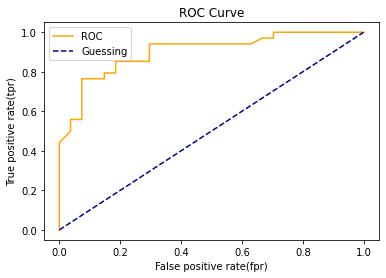

In [ ]:
#Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
  #Plots a ROC curve given the fpr and tpr of a model

  #Plot roc curve
  plt.plot(fpr,tpr,color="orange",label="ROC")
  #Plot line with no predictive power (baseline)
  plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")

  #Customize the plot
  plt.xlabel("False positive rate(fpr)")
  plt.ylabel("True positive rate(tpr)")
  plt.title("ROC Curve")
  plt.legend()
  plt.show()

plot_roc_curve(fpr,tpr)




In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)


0.5164634146341464

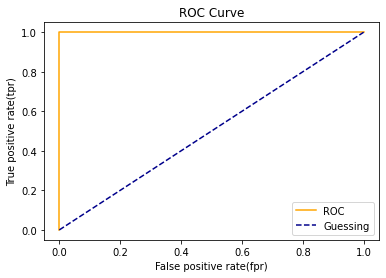

In [ ]:
#Plot perfect ROC AUC curve
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [ ]:
roc_auc_score(y_test,y_test)

1.0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
heart_disease=pd.read_csv("/heart-disease.csv")

In [ ]:
#Confusion Matrix

# A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
#In essence giving u an idea where model is getting confused

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf.fit(X_train,y_train)


from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[22,  5],
       [ 3, 31]])

In [ ]:
#Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual names"],colnames=["Predicted labels"])

Predicted labels,0,1
Actual names,,
0,22,5
1,3,31


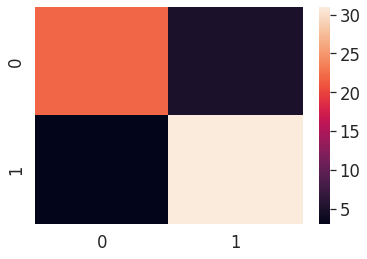

In [ ]:
#Make our confusion matrix more visual with seaborn's heatmap
import seaborn as sns

#Set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat=confusion_matrix(y_test,y_preds)

#Plot it using seaborn
sns.heatmap(conf_mat)

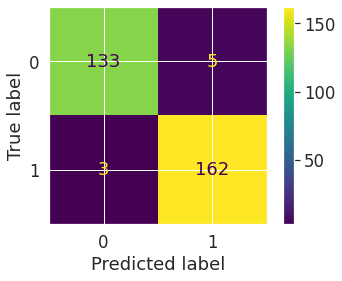

In [ ]:
#Creating a confusion matrix using sklearn

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)

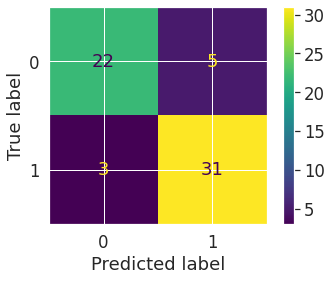

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds);

In [ ]:
##Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
#To summarize classification metrics:

#Accuracy is good measure to start with if all classes are balanced(same amount of samples which are labelled 0 and 1)
#Precission and recall become more useful when there is class imbalance
#If false positive precisions are worse than false negatives,aim for higher precision
#If false  negative predictions are worse than false positives,aim for higher recall
#F1 score is combination of precision and recall.

In [ ]:
#4.2.2 Regression evaluation metrics
# We are going to cover:
# 1) R^2 or coefficient of determination
# 2) Mean absolute error (MAE)
# 3) Mean squared error (MSE)


In [ ]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df["target"]=housing["target"]



from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
model.score(X_test,y_test)

0.8066196804802649

In [ ]:
y_test.mean()

2.0550030959302323

In [ ]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
# Fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [ ]:
r2_score(y_true=y_test,y_pred=y_test_mean)

0.0

In [ ]:
#What R^2 does:Compares your model predictions with mean of targets
#Ranges from -infinty to 1.
#If model only predicts mean of targets,R^2=0.
#If model perfectly predicts range of numbers,R^2=1


In [ ]:
#Mean Absolute error
# average of absolute differences between predictions and actual value
# gives idea how wrong your model predictions are

from sklearn.metrics import mean_absolute_error
y_preds=model.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)
mae

0.3265721842781009

In [ ]:
df=pd.DataFrame(data={"actual values":y_test,"predicted values":y_preds})
df["differences"]=df["actual values"]-df["predicted values"]
df

,actual values,predicted values,differences
20046,0.47700,0.493840,-0.016840
3024,0.45800,0.754940,-0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.540290,-0.354290
9814,2.78000,2.331760,0.448240
...,...,...,...
15362,2.63300,2.220380,0.412620
16623,2.66800,1.947760,0.720240
18086,5.00001,4.836378,0.163632
2144,0.72300,0.717820,0.005180


In [ ]:
np.abs(df["differences"]).mean()

0.3265721842781009

In [ ]:
## Mean Squared Error
# mean of square of errors between actual and predicted values
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_preds)
mse

0.2534073069137548

In [ ]:
df["squared differences"]=np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,-0.016840,0.000284
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540290,-0.354290,0.125521
9814,2.78000,2.331760,0.448240,0.200919


In [ ]:
df_large_error=df.copy()
df_large_error.iloc[0]["squared differences"]=16
df_large_error.head()

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,-0.016840,16.000000
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540290,-0.354290,0.125521
9814,2.78000,2.331760,0.448240,0.200919


In [ ]:
#Calcuate MSE with large error
df_large_error["squared differences"].mean()

0.25728320720794084

In [ ]:
df_large_error.iloc[1:100]=20
df_large_error

,actual values,predicted values,differences,squared differences
20046,0.47700,0.493840,-0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,0.412620,0.170255
16623,2.66800,1.947760,0.720240,0.518746
18086,5.00001,4.836378,0.163632,0.026775
2144,0.72300,0.717820,0.005180,0.000027


In [ ]:
df_large_error["squared differences"].mean()

0.7333540351264799

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#4.2.3 Finally using the scoring parameter

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
heart_disease=pd.read_csv("/heart-disease.csv")

X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)



RandomForestClassifier()

In [ ]:
np.random.seed(42)
#Cross valuation score
cv_acc=cross_val_score(clf,X,y,cv=5,scoring=None)
#If scoring=None estimators default scoring evaluation metric is used(accuracy for classification problems)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [ ]:
cv_acc.mean()

0.8248087431693989

In [ ]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc.mean()

0.8248087431693989

In [ ]:
##Cross_validated_precison
np.random.seed(42)
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [ ]:
cv_precision.mean()

0.8329547346025924

In [ ]:
#Cross validated recall
np.random.seed(42)
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [ ]:
cv_recall.mean()

0.8545454545454545

In [ ]:
#Let's see the scoring parameter for regression problem
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df["target"]=housing["target"]

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]


In [ ]:
model=RandomForestRegressor()

In [ ]:
#Cross_validated_R^2
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring=None)
np.mean(cv_r2)

0.6521420895559876

In [ ]:
#Cross_validated_MAE
np.random.seed(42)
cv_mae=cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.4662123287693799

In [ ]:
#Cross_validated_MSE #neg(ative) is used because all scoring metrics follow'higher value is better than lower value'
np.random.seed(42)
cv_mse=cross_val_score(model,X,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.43011254261460774

In [ ]:
#Using different evaluation metrics as Scikit-Learn functions

#The 3rd way to evaluate sklearn modules/estimators is to use the sklearn.metrics module

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
y=heart_disease["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_preds=clf.predict(X_test)


In [ ]:
accuracy_score(y_test,y_preds)


0.8524590163934426

In [ ]:
precision_score(y_test,y_preds)

0.8484848484848485

In [ ]:
recall_score(y_test,y_preds)

0.875

In [ ]:
f1_score(y_test,y_preds)

0.8615384615384615

In [ ]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
housing_df=pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df["target"]=housing["target"]

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=housing_df.drop("target",axis=1)
y=housing_df["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)

In [ ]:
r2_score(y_test,y_preds)

0.8066196804802649

In [ ]:
mean_absolute_error(y_test,y_preds)

0.3265721842781009

In [ ]:
mean_squared_error(y_test,y_preds)

0.2534073069137548

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
## 5. Improving a model

#First prediction=baseline predictions
#First model=baseline model

#From a data perspective
#Could we collect more data?(generally the more data,the better)
#Could we improve our data?

#From a model perspective:
#Is there a better model we can use?
#Could we improve the current model?

#Parameters vs Hyperparameters
#Parameters=model find these patterns in data
#Hyperparameters=settings on a model you can adjust to (potentially) improve its ability tyo find patterns

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()          #to find hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#THREE WAYS TO ADJUST HYPERPARAMETRERS

#1. By hand
#2. Randomly with RandomSearchCV
#3.Exhaustively with GridSearchCV

In [ ]:
## 5.1 By hand
 # we divide our data into three sets : Train,Validations(Practice exams,will change hyperpara here ),Test(Final exams)

In [ ]:
# We are goin to try and adjust:
# max_depth
# max_features
# min_samples_leaf
# min_samples_split
# n_estimators

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def evaluate_preds(y_true,y_preds):
  #Performs evaluation comparison of y_true labels vs y_preds labels on classification

  accuracy=accuracy_score(y_true,y_preds)
  precision=precision_score(y_true,y_preds)
  recall=recall_score(y_true,y_preds)
  f1=f1_score(y_true,y_preds)

  metric_dicts={"Accuracy":round(accuracy,2),
                "Precision":round(precision,2),
                "Recall":round(recall,2),
                "f1":round(f1,2)}
  print(f"Accuracy:{accuracy*100:.2f}%")
  print(f"Precision: {precision:.2f}")
  print(f"reacll: {recall:.2f}")
  print(f"f1: {f1:.2f}")
  return metric_dicts


In [ ]:
heart_disease=pd.read_csv("/heart-disease.csv")
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

#Shuffle the data
heart_disease_shuffled=heart_disease.sample(frac=1)

#Split into X and Y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

#Split the data into train,validate and test sets
train_split=round(0.7*len(heart_disease_shuffled)) #70% of data
valid_split=round(train_split+0.15*len(heart_disease_shuffled)) #15% of data
X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

In [ ]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

#Make baseline predictions
y_preds=clf.predict(X_valid)

#Evaluate the classifier on validtaion_set
baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics

Accuracy:80.00%
Precision: 0.81
reacll: 0.84
f1: 0.82


{'Accuracy': 0.8, 'Precision': 0.81, 'Recall': 0.84, 'f1': 0.82}

In [ ]:
#Create a model with different hyperparameters
np.random.seed(42)
clf_2=RandomForestClassifier(n_estimators=100,max_depth=10)
clf_2.fit(X_train,y_train)
y_preds2=clf_2.predict(X_valid)

clf_2_metrics=evaluate_preds(y_valid,y_preds2)
clf_2_metrics


Accuracy:80.00%
Precision: 0.81
reacll: 0.84
f1: 0.82


{'Accuracy': 0.8, 'Precision': 0.81, 'Recall': 0.84, 'f1': 0.82}

In [ ]:
#Hyperparameters using RandomizedSearchCV (CV stands for  cross validated)
#("Its very diificult to ajust and do trail and errors by hand method,thus we use this")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

grid={"n_estimators":[10,20,200,500,1000,1200],
      "max_depth":[None,5,10,20,30],
      "max_features":["auto","sqrt"],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]}

np.random.seed(42)
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)  #n_jobs is how much processor computer is allocating to u for machine learning model

#Set up RandomizedSearchCV
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,
                          n_iter=10, #number of models to try
                          cv=5,verbose=2)

#Fit the RandimizedSearchCV version of CLF
rs_clf.fit(X_train,y_train)
# 50 combo (10(n_iter)*5(cv))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=20; t

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 20, 200, 500, 1000,
                                                         1200]},
                   verbose=2)

In [ ]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [ ]:
#Make predictions with the best hyperpara
rs_y_preds=rs_clf.predict(X_test)

# Evaluate the prediction
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Accuracy:83.61%
Precision: 0.78
reacll: 0.89
f1: 0.83


In [ ]:
#Hyperparameter tuning with GridSearchCV

In [ ]:
grid

{'n_estimators': [10, 20, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
# the key difference between radmizedsearchcv and gridsearchcv is that the former has n_iters,while gridsearchcv tries for every combination
# possibile i.e for grid it would try 540 combinations * 5 times (becoz cv=5)

In [ ]:
grid_2={'n_estimators': [100,200, 500], #reducing the number of hyperparameters in order to get speedy results and our processor
        'max_depth': [None],              # able to load it. from randomizedsearchcv_best_params,we have got best hyperparams so we
        'max_features': ['auto', 'sqrt'],                # can remove some of the other hyperparameters in order to reduce
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}


In [ ]:
from sklearn.model_selection import GridSearchCV,train_test_split
np.random.seed(42)

X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)  #n_jobs is how much processor computer is allocating to u for machine learning model

#Set up RandomizedSearchCV
gs_clf=GridSearchCV(estimator=clf,param_grid=grid_2,
                    cv=5,verbose=2)

#Fit the RandimizedSearchCV version of CLF
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [ ]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [ ]:
gs_y_preds=gs_clf.predict(X_test)

#evaluate our metrics
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Accuracy:78.69%
Precision: 0.74
reacll: 0.82
f1: 0.78


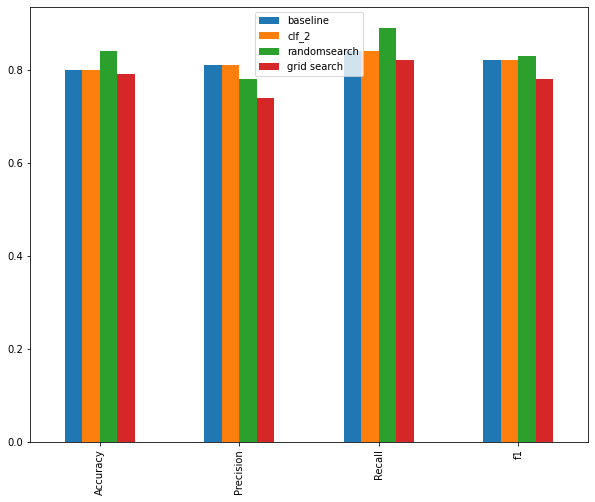

In [ ]:
import matplotlib.pyplot as plt

compare_metrics=pd.DataFrame({"baseline":baseline_metrics,
                             "clf_2":clf_2_metrics,
                              "randomsearch":rs_metrics,
                              "grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Forward and Backward Attributes
# In forward attribute,we start with only one column and then go on adding others
# In backward attribute, we start with all columns and then start to remove them slowly and see whether it affects our model
# Both the practices are better than taking all the parameters and assuming that it would make our model perfect

In [ ]:
# Saving and loading trained machine learning models
# Two ways to do it:
# 1)With python's pickle module
# 2) With the joblib module

In [ ]:
# Check gallery for code

In [ ]:
## Putting it all together
data=pd.read_csv("/content/Car_sales_extended_missing.csv")

In [ ]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [ ]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [ ]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [ ]:
# Steps we need to do:
# 1 Fill missing data
# 2 Convert data into numbers
# 3 Build a model on data

In [ ]:
# Getting data ready
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# Set up random seed
np.random.seed(42)

#Import data and drop row with missing labels
data=pd.read_csv("/content/Car_sales_extended_missing.csv")
data.dropna(subset=["Price"],inplace=True)

# Define different features and transform pipleline
categorical_features=["Make",'Colour']
categorical_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
                                        ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_features=["Doors"]
door_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value=4))])

numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])

#Setup preprocessing steps (filling missing values,then convert to numbers)
preprocessor=ColumnTransformer(transformers=[
                               ("cat",categorical_transformer,categorical_features),
                               ("door",door_transformer,door_features),
                               ("num",numeric_transformer,numeric_features)
])

# Creating a preprocessing and modelling pipeline
model=Pipeline(steps=[("preprocessor",preprocessor),
                       ("model",RandomForestRegressor())])
#Split the data
X=data.drop("Price",axis=1)
y=data["Price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#Fit the data
model.fit(X_train,y_train)

#Evaluate the model
model.score(X_test,y_test)

0.22188417408787875

In [ ]:
# It is also possible to use GridSearchCV or RandomizedSearchCV with our pipeline

In [ ]:
# Use GridSearchCV with our regression Pipeline
pipe_grid={
    "preprocessor__num__imputer__strategy": ["mean","median"],
    "model__n_estimators": [100,1000],
    "model__max_depth": [None,5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2,4]
}
gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [ ]:
gs_model.score(X_test,y_test)

0.3339554263158365